---


# Curso: Data Mining - Semana 9
# Clustering : DBSCAN y Hierarquical clustering


Docente: Soledad Espezúa (s.espezual@up.edu.pe)

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option("display.max_columns", 50)

## Personality traits of Twitter users (celebrities) Dataset

In [ ]:
dataset = pd.read_csv("TheBigFive.csv")

dataset.rename(columns={"usuario":"User", "op":"Openness", "co":"Conscientiousness", "ex":"Extraversion", "ag":"Agreeableness", "ne":"Neuroticism", "categoria":"Category"}, inplace=True)

dataset.shape

(140, 8)

In [ ]:
dataset.head()

,User,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,wordcount,Category
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
set(dataset["Category"])

{1, 2, 3, 4, 5, 6, 7, 8, 9}

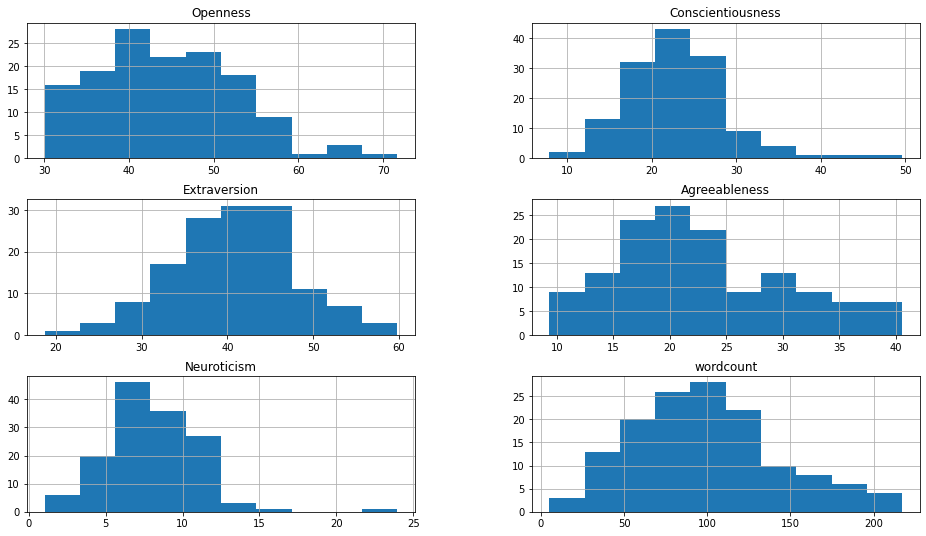

<Figure size 720x576 with 0 Axes>

In [ ]:
dataset.drop(["Category"], axis=1).hist(figsize=(16, 9))
plt.figure(figsize=(10, 8))
plt.show()

## Pre-processing

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Openness,140.0,44.414591,8.425723,30.020465,38.206484,44.507091,49.365923,71.696129
Conscientiousness,140.0,22.977135,5.816851,7.852756,19.740299,22.466718,26.091606,49.637863
Extraversion,140.0,40.764428,7.185246,18.693542,36.095722,41.457492,45.197769,59.824844
Agreeableness,140.0,22.918528,7.657122,9.305985,17.050993,21.384554,28.678866,40.583162
Neuroticism,140.0,8.000098,3.039248,1.030213,6.086144,7.839722,9.758189,23.978462
wordcount,140.0,98.715484,44.714071,5.020800,66.218475,94.711400,119.707925,217.183200
Category,140.0,4.050000,2.658839,1.000000,2.000000,3.500000,7.000000,9.000000


In [ ]:
dataset = dataset[["Openness", "Extraversion", "Agreeableness", "Category"]]

In [ ]:
x = np.array(dataset[["Openness", "Extraversion", "Agreeableness"]])

y = np.array(dataset["Category"])

In [ ]:
x.shape, y.shape

((140, 3), (140,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Es bueno estandarizar los datos (escala unitaria) para evitar que los atributos con escalas mayores dominen
X_standardized = StandardScaler().fit_transform(x)

# Dendrogram


In [ ]:
# Libreria para construir el dendrograma
import scipy.cluster.hierarchy as shc

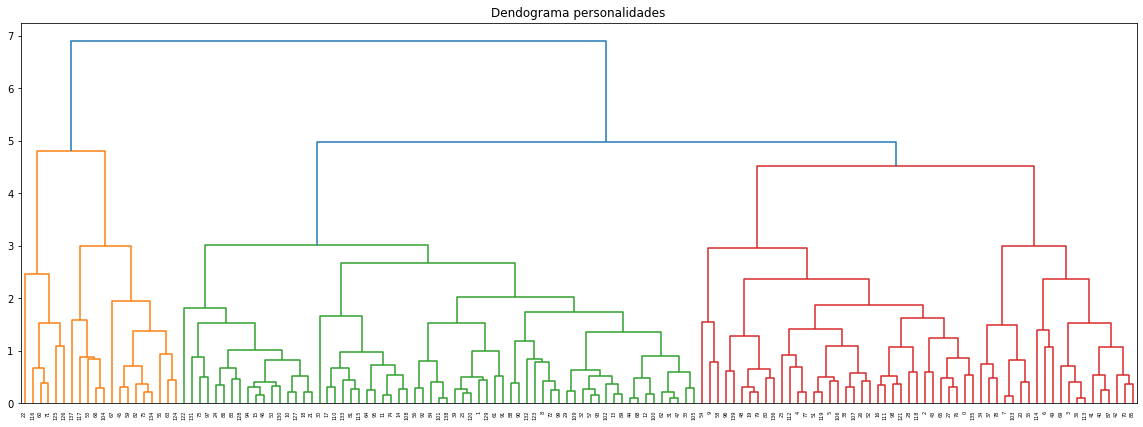

In [ ]:
# Plotea un dendrograma de la data estandarizada contruido con el metodo 'ward'
plt.figure(figsize=(20, 7))
linked = shc.linkage(X_standardized, method= 'complete')  # method='single','ward', 'complete','average','centroid'
shc.dendrogram( linked )  # plotea dendrograma
plt.title("Dendograma personalidades")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# distance_threshold : umbral de distancia por encima del cual los clústeres no deben fusionarse
# n_clusters : número de clústeres a buscar
# n_clusters=None, si distance_threshold=0.  Por defecto n_clusters=2.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete') #linkage{"ward", "complete", "average", "single"}, default="ward"

model = model.fit(X_standardized)

In [ ]:
# Función para graficar el dendrograma
def plot_dendrogram(model, **kwargs):
  # Crear un linkage matrix y luego grafica el dendrograma

  # crea los conteos de muestras debajo de cada nodo
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_): # imprimiendo las tuplas en el objeto directamente
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 # nodo hoja
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  dendrogram(linkage_matrix, **kwargs)

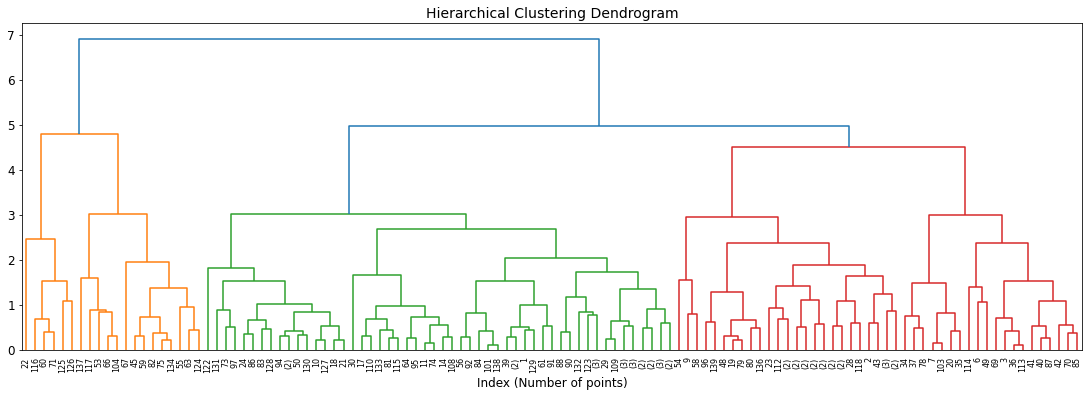

In [ ]:
figure = plt.figure(figsize=(19, 6))

plot_dendrogram(model, truncate_mode="level", p = 8 ) # grafica los 4 mayores clusters del dendrograma

plt.title("Hierarchical Clustering Dendrogram", fontdict={"fontsize": 14})
plt.xlabel("Index (Number of points)", fontdict={"fontsize": 12})

axis = plt.gca()

for tick in axis.xaxis.get_major_ticks():
  tick.label.set_fontsize(8)

for tick in axis.yaxis.get_major_ticks():
  tick.label.set_fontsize(12)

#figure.tight_layout()

plt.show()

### DBSCAN

DBSCAN es una tecnica de agrupamiento usada con frecuencia en Data Science. Esta tecnica se basa en la densidad de los objetos de datos. El principio es que si un dato pertenece a un cluster entonces el dato deberia estar cerca de muchos otros puntos del cluster. Los parámetros más importantes que tiene esta tecnica son:

    eps:  La distancia máxima entre dos muestras para que  se consideren vecinas
    min_samples:  El número minimo de muestras (o peso total) en una vecindad para que un punto se considere como un  "core sample".
    
La implementacion DBSCAN  de la libreria sklearn devuelve los indices de los core samples (<b>core_sample_indices_</b>) y las etiquetas asignadas a cada muestra (<b>labels_</b>).  Muestras que no pudieron ser clusterizadas son etiquetadas con -1

In [ ]:
# importa libreria DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
X_standardized

In [ ]:
# parametros para DBSCAN
epsilon =0.5
minimumSamples = 6

# Para trabajar con DBSCAN es bueno tener los datos estandarizados, asi el epsilon lo definimos en la escala unitaria
dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_standardized) # Ejecuta DBSCAN sobre la data estandarizada
dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0, -1, -1,  2,  1, -1, -1,  0, -1,  0,  1,  0,  0,  1,  0, -1,
        1,  0, -1, -1,  0, -1, -1, -1,  0,  2, -1, -1,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  2,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,
        1,  2, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  1,  1, -1, -1,
        0, -1, -1, -1, -1, -1,  0,  0, -1,  2, -1, -1, -1,  1, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  1, -1, -1,  2, -1,  0,  0,
        0, -1, -1,  0,  1,  1,  1,  0,  0,  2, -1, -1, -1,  1, -1, -1, -1,
        1,  0,  2, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1,  1,  0, -1,
       -1, -1,  0, -1])

In [ ]:
# muestra cuantos grupos distintos ha detectado Dbscan. -1 indica las muestras no agrupadas
set(dbscan_labels)

{-1, 0, 1, 2}

In [ ]:
# muestra el numero de muestras agruapadas (core_samples)
len(dbscan.core_sample_indices_)

35

## Visualizando los clústers

In [ ]:
dataframe_for_x = pd.DataFrame(X_standardized, columns=["Openness", "Extraversion", "Agreeableness"])

dataframe_for_y = pd.DataFrame(dbscan_labels, columns=["Labels"])

In [ ]:
df = pd.concat([dataframe_for_x, dataframe_for_y], axis=1)

In [ ]:
df

,Openness,Extraversion,Agreeableness,Labels
0,-1.204996,0.165428,0.845612,-1
1,0.068161,-0.394646,0.178325,0
2,-0.319303,-0.246459,1.537014,-1
3,-0.480900,1.616460,1.069976,-1
4,-0.923095,1.084760,1.077410,2
...,...,...,...,...
135,-1.053555,-0.259729,1.141040,-1
136,-1.483421,1.085083,2.251448,-1
137,3.249513,-1.842747,-0.501326,-1
138,0.848401,-0.600469,0.011749,0


In [ ]:
g_dbscan =df[df['Labels']>-1].copy()

In [ ]:
g_dbscan

,Openness,Extraversion,Agreeableness,Labels
1,0.068161,-0.394646,0.178325,0
4,-0.923095,1.084760,1.077410,2
5,-1.296256,0.341815,0.375916,1
8,0.235707,-0.116504,-0.820536,0
10,0.992951,0.130515,-0.768226,0
...,...,...,...,...
129,-0.072535,-0.621350,-0.171726,0
130,0.803567,0.462261,-0.725108,0
133,-0.429470,0.446560,-0.515891,1
134,1.613673,-1.032314,-0.686070,0


Text(0.5, 0, 'Agreeableness')

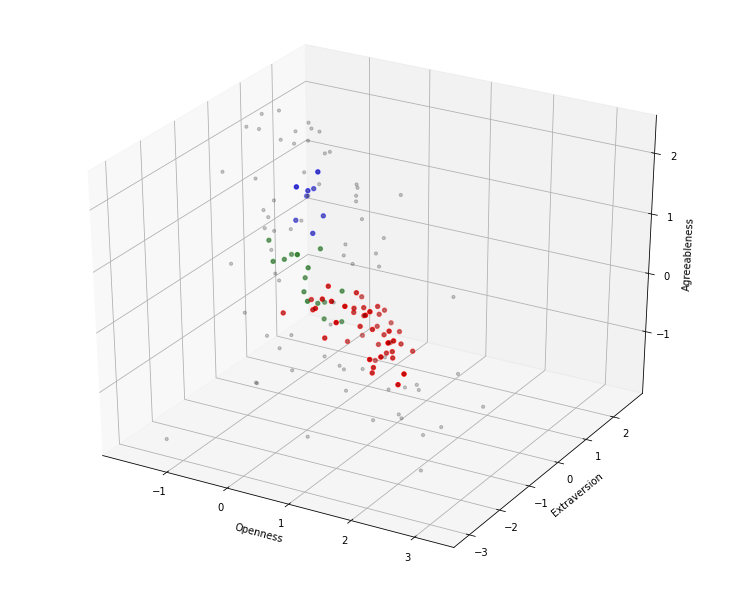

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in g_dbscan['Labels']:
    asignar.append(colores[row])

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

# Scatter plot de todos los datos (pintados en gris)
ax.scatter(df['Openness'], df['Extraversion'], df['Agreeableness'],  c='k', s=10,alpha=0.2)


# Scatter plot de los datos que fueron agrupados, coloreados segun su grupo
ax.scatter(g_dbscan['Openness'], g_dbscan['Extraversion'], g_dbscan['Agreeableness'], c=asignar,s=20)

# coloca etiquetas a los ejes
ax.set_xlabel('Openness')
ax.set_ylabel('Extraversion')
ax.set_zlabel('Agreeableness')

In [ ]:
import plotly.express as px
color=['red','green','blue']
figure = px.scatter_3d(df,
                       x=df['Openness'],
                       y=df['Extraversion'],
                       z=df['Agreeableness'],
                       color =df['Labels'],
                       title ="The Big Five personalities",
                       width=576, height=576)

figure.show()


In [ ]:
import plotly.express as px
figure = px.scatter_3d(df,
                       x="Openness",
                       y="Extraversion",
                       z="Agreeableness",
                       color ="Labels",
                       title ="The Big Five personalities",
                       width=576, height=576)

figure.show()

# Ejercicio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importa librerias para clustering
from sklearn.cluster import KMeans   # libreria de k-means
#pd.set_option("display.max_columns", 50)

<a name='clustering_segmentacion'></a>
## <font color=blue>Clustering para segmentacion de clientes</font>

Se tiene un conjunto de datos con informacion de clientes (Edad, Nivel educativo, Años de empleo, Ingresos, etc.). Se quiere encontrar grupos de clientes que tengan características comunes. Este proceso se llama segmentación de clientes. La utilidad de hacer esto es poder enfocar campañas de marketing de forma mas eficaz a cada grupo a fin de retener a los clientes.

In [ ]:
# Carga el dataset
import pandas as pd
df_customers = pd.read_csv("Cust_Segmentation.csv", index_col=0) # la 1era columna es el id del cliente

## Pre-processing

Las variable <b>Address</b>  es una variable categorica. K-means no consigue lidiar directamente con este tipo de variables. Retiraremos esta varible del analisis.

In [ ]:
df_customers = df_customers.drop('Address', axis=1) # elimina la columna Adress del dataframe
df_customers.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
# muestra una descripcion del dataset


In [ ]:
# Chequea si algun valor del Dataframe es faltante (valor NaN)


In [ ]:
# Elimina registros que tengan valores faltantes


Las magnitudes de las variables son diferentes, lo cual puede hacer que el algoritmo no le preste importancia a las variables de bajas magnitudes. Para superar ese problema se puede estandarizar las variables (hacer que tengan media=0 y varianza =1) con la funcion <b>StandardScaler</b> de la libreria sklearn

In [ ]:
# importa libreria StandardScaler


In [ ]:
# estandariza las columnas de df_customers con StandardScaler. El resultado es un numpy array


In [ ]:
# convierte el array de datos estandarizados a un DataFrame


In [ ]:
# muestra descripcion de los datos estandarizados


### Segmentacion de clientes  con k-means

Vamos aplicar k-means para ver si encontramos grupos de clientes relevantes. Probaremos con 3 grupos

#### Clusterizacion de los datos estandarizados de clientes

Entrenar el modelo con K-Means de Scikit-Learn

In [ ]:
# Configura un clusterizador kmeans con inicializacion "k-means++",  3 clusters  y 12 ejecuciones
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)

# Ejecuta K-means en la data estandarizada
k_means.fit( )

# recupera las etiquetas que  asignó k-means  a cada dato
k_means_labels = k_means.labels_

# obtiene los centros de los clusters quer encontro k-means
k_means_cluster_centers = k_means.cluster_centers_

# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la data estandarizada


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_std
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528,0
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222,1
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495,2
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528,0
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609,1


## Visualizando los clústers

In [ ]:
# muestra un scatter plot 3D de Age (estandarizado) vs Income (estandarizado)

In [ ]:
...........

In [ ]:
...........

In [ ]:
...........

## Dendogram

In [ ]:
...........

In [ ]:
...........

In [ ]:
...........

In [ ]:
...........

In [ ]:
...........